In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel("mall.xlsx")

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.drop('CustomerID',axis=1,inplace=True)

In [5]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [6]:
df.rename(columns = {'Annual Income (k$)': 'Income','Spending Score (1-100)': 'Score'},inplace=True) #column rename

In [7]:
df.head()

,Gender,Age,Income,Score
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [8]:
df.shape

(200, 4)

In [9]:
df.info

<bound method DataFrame.info of      Gender  Age  Income  Score
0      Male   19      15     39
1      Male   21      15     81
2    Female   20      16      6
3    Female   23      16     77
4    Female   31      17     40
..      ...  ...     ...    ...
195  Female   35     120     79
196  Female   45     126     28
197    Male   32     126     74
198    Male   32     137     18
199    Male   30     137     83

[200 rows x 4 columns]>

In [10]:
df.corr(numeric_only = True)

,Age,Income,Score
Age,1.000000,-0.012398,-0.327227
Income,-0.012398,1.000000,0.009903
Score,-0.327227,0.009903,1.000000


In [11]:
df.nunique() # unique value

Gender     2
Age       51
Income    64
Score     84
dtype: int64

# Visualization

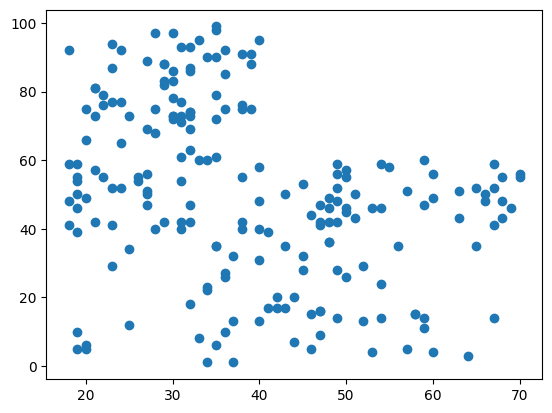

In [12]:
plt.scatter(df.Age,df.Score)

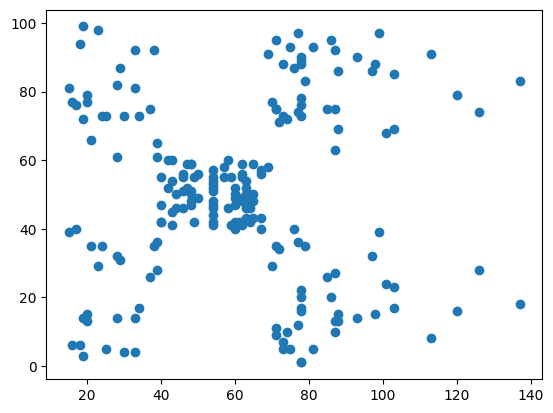

In [13]:
plt.scatter(df.Income,df.Score)

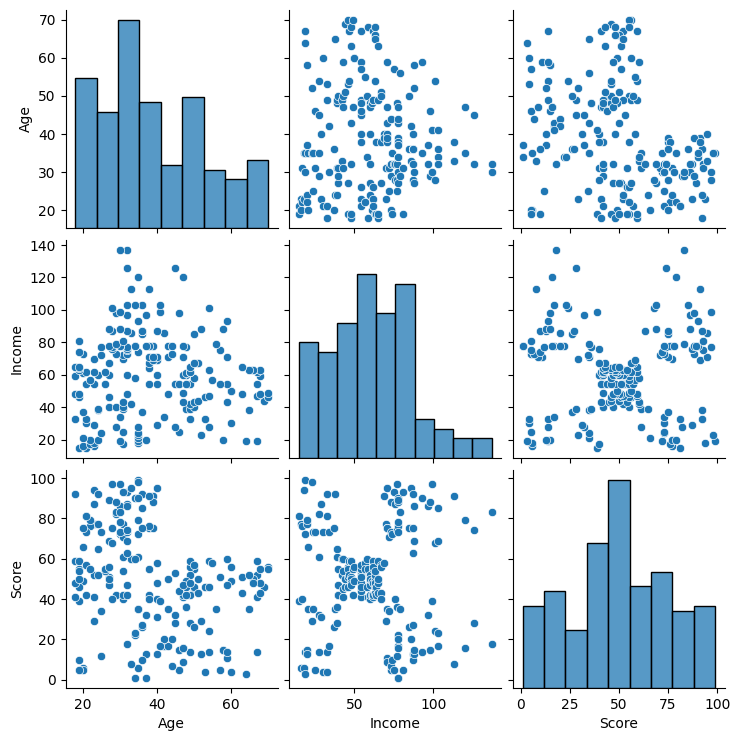

In [14]:
sns.pairplot(df[['Age','Income','Score']])

In [15]:
import sklearn.cluster as cluster

In [16]:
kmeans = cluster.KMeans() #by default k=8

In [17]:
pred = kmeans.fit_predict(df[['Income','Score']])

C:\Users\rabey\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [18]:
pred

array([4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0,
       4, 0, 4, 0, 4, 5, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 5, 0, 5, 5,
       4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 1, 5, 5, 1, 5, 1, 5, 5, 1, 1, 5, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 3, 2, 1, 2, 3, 2, 3, 2,
       1, 2, 3, 2, 3, 2, 3, 2, 3, 2, 1, 2, 3, 2, 1, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 1, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 6, 7, 6, 7, 6, 7, 6, 7, 6, 7, 6, 7, 6, 7, 6, 7, 6, 7, 6,
       7, 6])

In [19]:
df2 = df.copy()

In [20]:
df2.head()

,Gender,Age,Income,Score
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [21]:
df2['Predicted'] = pred
df2.head(10)

,Gender,Age,Income,Score,Predicted
0,Male,19,15,39,4
1,Male,21,15,81,0
2,Female,20,16,6,4
3,Female,23,16,77,0
4,Female,31,17,40,4
5,Female,22,17,76,0
6,Female,35,18,6,4
7,Female,23,18,94,0
8,Male,64,19,3,4
9,Female,30,19,72,0


In [22]:
centers = kmeans.cluster_centers_
centers

array([[ 24.95      ,  81.        ],
       [ 62.58333333,  47.29166667],
       [ 78.03571429,  81.89285714],
       [ 79.73913043,  13.39130435],
       [ 25.14285714,  19.52380952],
       [ 45.51282051,  51.51282051],
       [108.18181818,  82.72727273],
       [109.7       ,  22.        ]])

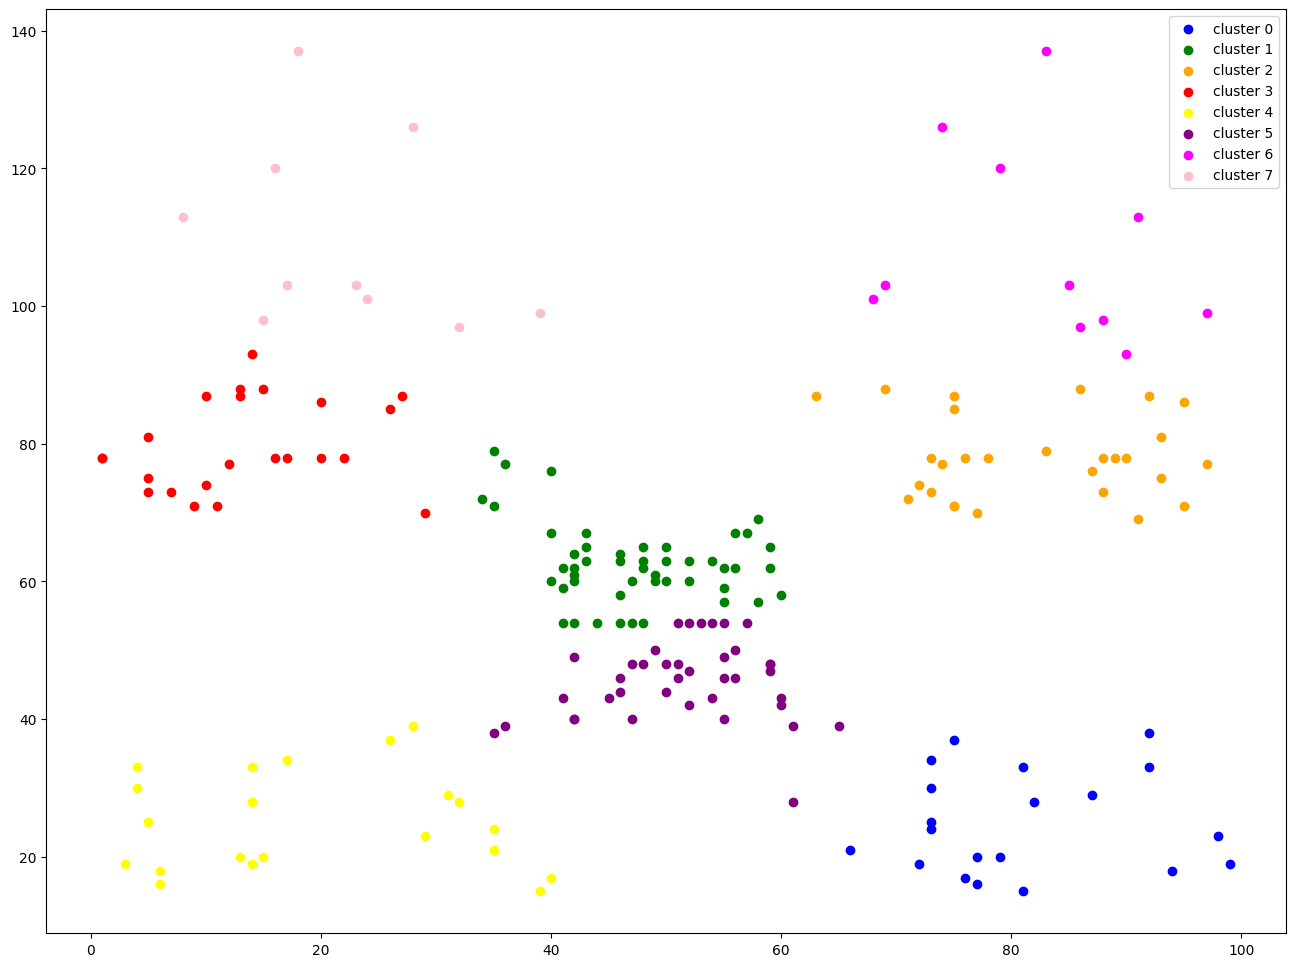

In [23]:
df0 = df2[df2.Predicted==0]
df1 = df2[df2.Predicted==1]
df8 = df2[df2.Predicted==2]
df3 = df2[df2.Predicted==3]
df4 = df2[df2.Predicted==4]
df5 = df2[df2.Predicted==5]
df6 = df2[df2.Predicted==6]
df7 = df2[df2.Predicted==7]


plt.figure(figsize=(16,12))

plt.scatter(df0['Score'],df0['Income'],color='blue',label='cluster 0')
plt.scatter(df1['Score'],df1['Income'],color='green',label='cluster 1')
plt.scatter(df8['Score'],df8['Income'],color='orange',label='cluster 2')
plt.scatter(df3['Score'],df3['Income'],color='red',label='cluster 3')
plt.scatter(df4['Score'],df4['Income'],color='yellow',label='cluster 4')
plt.scatter(df5['Score'],df5['Income'],color='purple',label='cluster 5')
plt.scatter(df6['Score'],df6['Income'],color='fuchsia',label='cluster 6')
plt.scatter(df7['Score'],df7['Income'],color='pink',label='cluster 7')

plt.legend()


# Elbow method use kore optimal solution

In [24]:
from sklearn.cluster import KMeans

In [25]:
wcss = []

In [26]:
cluster = range(1,15)

for k in cluster:
    kmean = KMeans(n_clusters=k)
    kmean.fit(df[['Income','Score']])
    wcss.append(kmean.inertia_)

C:\Users\rabey\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\rabey\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\rabey\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\rabey\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value 

In [27]:
wcss

[269981.28,
 181363.59595959593,
 106348.37306211118,
 73679.78903948836,
 44448.45544793371,
 37265.86520484347,
 31573.960664122747,
 25095.703209997548,
 21913.92920119442,
 19676.612585602805,
 17593.5340346421,
 16493.18041738963,
 14698.521756776248,
 13136.189330277566]

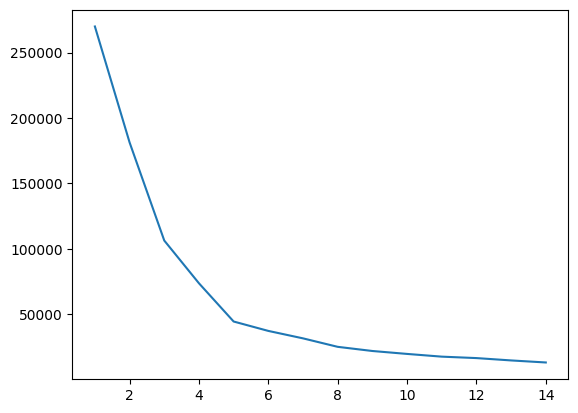

In [28]:
plt.plot(cluster,wcss)

In [29]:
!pip install kneed

In [30]:
from kneed import KneeLocator

In [31]:
kn = KneeLocator(cluster,wcss,direction='decreasing',curve='convex')

In [32]:
kn

In [33]:
print('optimal number of cluster : ',kn.knee)

optimal number of cluster :  5


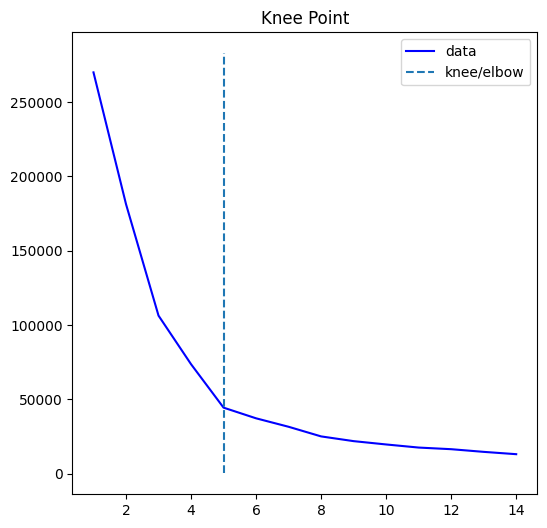

In [34]:
kn.plot_knee()

In [35]:
import sklearn.cluster as cluster
kmeans = cluster.KMeans(n_clusters=5)
predicted = kmeans.fit_predict(df[['Income','Score']])

C:\Users\rabey\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [36]:
predicted

array([2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1,
       2, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 4, 3, 1, 3, 4, 3, 4, 3,
       1, 3, 4, 3, 4, 3, 4, 3, 4, 3, 1, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3])

In [37]:
df['Predicted'] = pred

In [38]:
df.head()

,Gender,Age,Income,Score,Predicted
0,Male,19,15,39,4
1,Male,21,15,81,0
2,Female,20,16,6,4
3,Female,23,16,77,0
4,Female,31,17,40,4


In [39]:
centre1 = kmeans.cluster_centers_

In [40]:
centre1

array([[25.72727273, 79.36363636],
       [55.2962963 , 49.51851852],
       [26.30434783, 20.91304348],
       [86.53846154, 82.12820513],
       [88.2       , 17.11428571]])

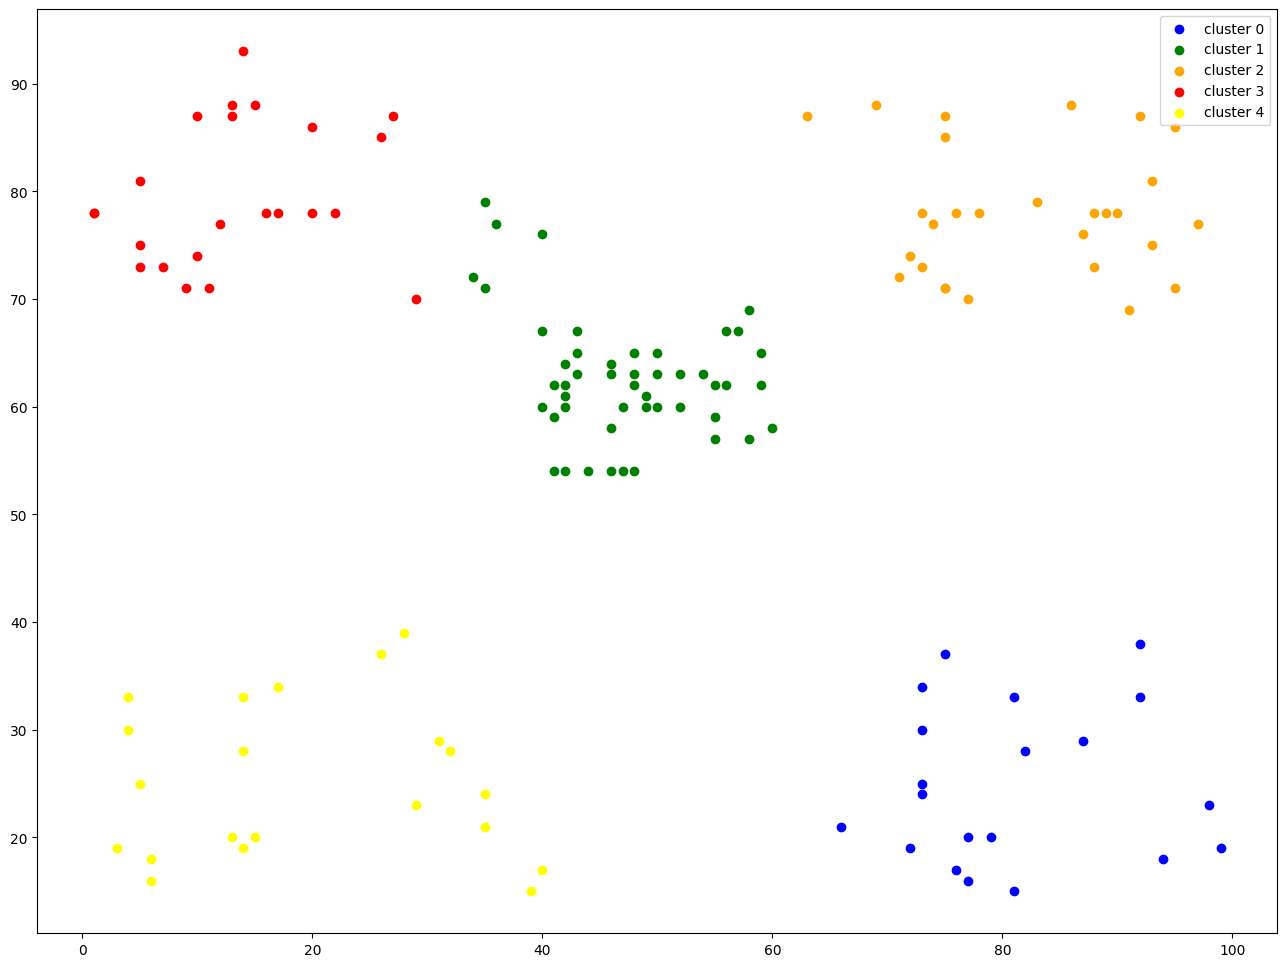

In [41]:
df0 = df[df.Predicted==0]
df1 = df[df.Predicted==1]
df2 = df[df.Predicted==2]
df3 = df[df.Predicted==3]
df4 = df[df.Predicted==4]



plt.figure(figsize=(16,12))

plt.scatter(df0['Score'],df0['Income'],color='blue',label='cluster 0')
plt.scatter(df1['Score'],df1['Income'],color='green',label='cluster 1')
plt.scatter(df2['Score'],df2['Income'],color='orange',label='cluster 2')
plt.scatter(df3['Score'],df3['Income'],color='red',label='cluster 3')
plt.scatter(df4['Score'],df4['Income'],color='yellow',label='cluster 4')


plt.legend()
